# Fruit Classification using CNN


If you changed something in your drive after you did the drive.mount('/content/drive'), you have to remount it with drive.mount('/content/drive', force_remount=True). force_remount is used only when you have to mount the drive irrespective of whether its loaded previously.

In [4]:
import cv2
import numpy as np
import os

In [5]:
trainingDataset = []
classNumber = 0
img_size = 100
path = 'fruits-360/Training'
categories = os.listdir(path)
labels = [i for i in range(len(categories))]


print(os.listdir(path))
label_dict = dict(zip(categories , labels))


['Cauliflower', 'Cherry 2', 'Cherry Rainier', 'Fig', 'Grape Blue', 'Melon Piel de Sapo', 'Peach 2', 'Pear Forelle', 'Pear Stone', 'Pepper Orange', 'Plum 3', 'Strawberry Wedge', 'Tomato 1', 'Tomato 3', 'Walnut']


The clear() method removes all items from the list.

In [6]:
data = []
target = []
trainingDataset.clear()
for folder in (os.listdir(path)):
  print(classNumber)
  fp = os.path.join(path,folder)
  for eachImage in os.listdir(fp):

    imagePath = os.path.join(fp,eachImage)
    img = (cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE))/255
    resized = cv2.resize(img , (img_size, img_size))
    data.append(resized)
    
    target.append(label_dict[folder])

    trainingDataset.append([resized,classNumber])
  classNumber = classNumber + 1

print(len(trainingDataset))
print(len(trainingDataset[0]))
print(trainingDataset[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
11304
2
[array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]]), 0]


In [7]:
import numpy as np

data = np.array(data) / 255.0

data = np.reshape(data , (data.shape[0], img_size, img_size, 1 ))

target = np.array(target)

from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

np.save('data', data)
np.save('target', new_target)


In [8]:
import numpy as np 

data = np.load('data.npy')
target = np.load('target.npy')

Module 'time' is used to handle time-related tasks.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import time

In [10]:
X = []
Y = []
img_size = 100
np.random.shuffle(trainingDataset)
for features, label in trainingDataset:
    X.append(features)
    Y.append(label)
print(Y)    

[11, 5, 1, 5, 9, 5, 0, 11, 0, 10, 4, 1, 8, 1, 1, 12, 13, 0, 5, 11, 0, 9, 9, 12, 10, 12, 2, 6, 1, 3, 12, 11, 1, 14, 6, 11, 1, 2, 4, 3, 8, 11, 1, 8, 4, 0, 1, 1, 12, 3, 4, 2, 6, 9, 12, 4, 11, 12, 12, 7, 4, 6, 12, 5, 5, 14, 8, 4, 9, 3, 3, 8, 8, 5, 9, 10, 3, 0, 11, 0, 1, 4, 0, 5, 6, 7, 13, 11, 0, 5, 13, 10, 4, 5, 6, 1, 14, 1, 1, 0, 13, 6, 6, 8, 11, 11, 9, 6, 7, 8, 10, 8, 11, 8, 10, 6, 10, 1, 12, 0, 10, 6, 12, 4, 8, 4, 11, 9, 3, 8, 13, 3, 7, 14, 0, 1, 2, 7, 6, 12, 4, 8, 12, 7, 11, 9, 8, 11, 2, 3, 0, 7, 5, 10, 4, 2, 10, 13, 7, 12, 3, 1, 12, 8, 4, 13, 2, 7, 9, 12, 1, 4, 3, 14, 1, 8, 7, 14, 2, 7, 7, 8, 6, 6, 8, 14, 0, 8, 3, 6, 0, 4, 3, 14, 5, 9, 14, 4, 4, 13, 10, 10, 14, 7, 12, 13, 7, 14, 2, 3, 8, 9, 6, 0, 4, 4, 14, 13, 11, 14, 11, 4, 0, 13, 8, 10, 11, 5, 11, 12, 0, 7, 10, 2, 9, 4, 11, 8, 4, 11, 11, 1, 8, 9, 13, 2, 9, 1, 11, 13, 11, 7, 3, 14, 10, 11, 8, 4, 12, 13, 7, 13, 2, 5, 10, 2, 4, 8, 6, 3, 14, 8, 2, 1, 2, 5, 3, 7, 0, 9, 0, 12, 1, 14, 14, 13, 14, 11, 7, 8, 8, 4, 3, 4, 0, 12, 13, 9, 13, 6, 

In [11]:
X = np.array(X).reshape(-1, img_size, img_size, 1)
Y_binary = to_categorical(Y)
print(Y_binary)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Overfitting:** Good performance on the training data, poor generliazation to other data. <br>
**Underfitting:** Poor performance on the training data and poor generalization to other data.

**Dropout** is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.<br>
(Dropout(0.3) means setting 30% inputs to zero.

In [12]:
model = Sequential()

model.add(Conv2D(40, (3, 3), input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(60, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(80, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('relu'))
 
model.add(Dense(15))
model.add(Activation('softmax'))

In [13]:
from sklearn.model_selection import train_test_split

train_data , test_data , train_target , test_target = train_test_split(data , target , test_size = 0.1)

TensorBoard is a tool/dashboard for providing the measurements and visualizations needed during the machine learning workflow.

In [14]:
# NAME = "3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN"
# tensorboard = TensorBoard(log_dir="/content/drive/My Drive/fruitsData/Logs/{}".format(NAME))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

---- batch_size = 32 <br>
---- validation_split = 0.3

In [15]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model' , monitor = 'val-loss' , verbose= 0 , save_best_only= True ,mode='auto')

history = model.fit(X, Y_binary,
          batch_size = 32,
          epochs=10, validation_split = 0.3)
 

# history = model.fit(train_data , train_target , epochs= 10 , callbacks= [checkpoint] , validation_split= 0.2) 
model.save("fruits-360/Models/{NAME}.model")

Epoch 1/10
248/248 [==============================] - 98s 366ms/step - loss: 0.6485 - accuracy: 0.7769 - val_loss: 0.0812 - val_accuracy: 0.9823
Epoch 2/10
248/248 [==============================] - 94s 377ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0810 - val_accuracy: 0.9802
Epoch 3/10
248/248 [==============================] - 94s 378ms/step - loss: 0.0399 - accuracy: 0.9886 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/10
248/248 [==============================] - 93s 376ms/step - loss: 0.0170 - accuracy: 0.9971 - val_loss: 0.0048 - val_accuracy: 0.9994
Epoch 5/10
248/248 [==============================] - 91s 368ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
248/248 [==============================] - 92s 371ms/step - loss: 3.3669e-04 - accuracy: 1.0000 - val_loss: 5.8018e-04 - val_accuracy: 1.0000
Epoch 7/10
248/248 [==============================] - 92s 370ms/step - loss: 1.1392e-04 - accuracy: 1.0000 - val_loss: 2.3

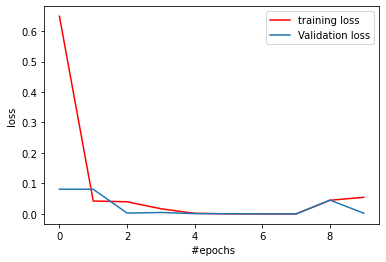

In [16]:
from matplotlib import pyplot as plt


plt.plot(history.history['loss'] , 'r' , label= 'training loss')
plt.plot(history.history['val_loss'] , label = 'Validation loss')

plt.xlabel(' #epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


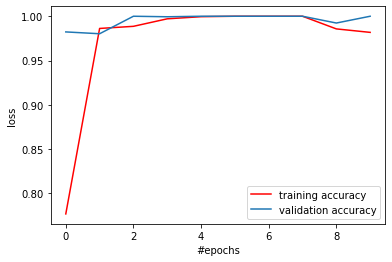

In [17]:
plt.plot(history.history['accuracy'] , 'r' , label = 'training accuracy')
plt.plot(history.history['val_accuracy']  ,label = 'validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [18]:
print(model.evaluate(test_data,test_target))


36/36 [==============================] - 3s 71ms/step - loss: 54.4660 - accuracy: 0.0849
[54.46597671508789, 0.08488063514232635]


prepare() function prepares a test image according to the NN architecture

In [19]:
def prepare(filepath):
    img_size = 100 
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)/255  
    img_resize = cv2.resize(img, (img_size, img_size))  
    return img_resize.reshape(-1, img_size, img_size, 1)

The numpy.argmax() function returns index of the max element of the array

In [23]:
prediction = model.predict(prepare("fruits-360/Test/Cherry 2/17_100.jpg"))
# print((prediction))

CATEGORIES = ['Cauliflower', 'Cherry 2', 'Cherry Rainier', 'Fig', 'Grape Blue', 'Melon Piel de Sapo', 'Peach 2', 'Pear Forelle', 'Pear Stone', 'Pepper Orange', 'Plum 3', 'Strawberry Wedge', 'Tomato 1', 'Tomato 3', 'Walnut']

pred_class = CATEGORIES[np.argmax(prediction)]
print("The pedicted Class is : " + pred_class)



The pedicted Class is : Cherry 2
